In [ ]:
!unzip dataset_soil_kaggle.zip

Archive:  dataset_soil_kaggle.zip
  inflating: Soil types/Black Soil/10.jpg  
  inflating: Soil types/Black Soil/11.jpg  
  inflating: Soil types/Black Soil/12.jpg  
  inflating: Soil types/Black Soil/13.jpg  
  inflating: Soil types/Black Soil/14.jpg  
  inflating: Soil types/Black Soil/15.jpg  
  inflating: Soil types/Black Soil/16.jpg  
  inflating: Soil types/Black Soil/17.jpg  
  inflating: Soil types/Black Soil/18.jpg  
  inflating: Soil types/Black Soil/19.jpg  
  inflating: Soil types/Black Soil/2.jpg  
  inflating: Soil types/Black Soil/20.jpg  
  inflating: Soil types/Black Soil/21.jpg  
  inflating: Soil types/Black Soil/22.jpg  
  inflating: Soil types/Black Soil/23.jpg  
  inflating: Soil types/Black Soil/24.jpg  
  inflating: Soil types/Black Soil/25.jpg  
  inflating: Soil types/Black Soil/26.jpg  
  inflating: Soil types/Black Soil/27.jpg  
  inflating: Soil types/Black Soil/28.jpg  
  inflating: Soil types/Black Soil/29.jpg  
  inflating: Soil types/Black Soil/3.jpg  


In [ ]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('Soil types/Black Soil')
dir_Cinder = os.path.join('Soil types/Cinder Soil')
dir_Laterite = os.path.join('Soil types/Laterite Soil')
dir_peat = os.path.join('Soil types/Peat Soil')
dir_yellow = os.path.join('Yellow Soil')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 224
batch_size = 16


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (224, 224)
train_datagen = ImageDataGenerator(rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        validation_split=0.15)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255., validation_split=0.15)
valid_generator = valid_datagen.flow_from_directory(
    'Soil types/',
    subset="validation",
    batch_size = batch_size,
    target_size=IMAGE_SHAPE
)

train_generator = train_datagen.flow_from_directory(
        'Soil types/',
        target_size=(224, 224),
        batch_size = batch_size)

Found 21 images belonging to 5 classes.
Found 156 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
from keras.metrics import Precision , Recall

model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy',Precision(),Recall()])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(
        train_generator,
        epochs = 50,
        validation_data= valid_generator,
        callbacks = [checkpoint])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.6175 - accuracy: 0.2115 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.23810, saving model to best_model.hdf5
10/10 [==============================] - 10s 801ms/step - loss: 1.6175 - accuracy: 0.2115 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5897 - val_accuracy: 0.2381 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.5707 - accuracy: 0.2308 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_accuracy improved from 0.23810 to 0.33333, saving model to best_model.hdf5
10/10 [==============================] - 9s 815ms/step - loss: 1.5707 - accuracy: 0.2308 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4349 - val_accuracy: 0.3333 - val_precision: 1.0000 - val_recall: 0.0476
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 1.3597 - accuracy: 0.3654 - precision: 0.5312 - recall: 0.1090
Epoch 3: val_accuracy improved from 0.33333 to 0.42857, saving model to best_model.hdf5
10/10 [==============================] - 9s 913ms/step - loss: 1.3597 - accuracy: 0.3654 - precision: 0.5312 - recall: 0.1090 - val_loss: 1.0270 - val_accuracy: 0.4286 - val_precision: 0.8000 - val_recall: 0.1905
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 1.1827 - accuracy: 0.4038 - precision: 0.4677 - reca

In [ ]:
import matplotlib.pyplot as plt

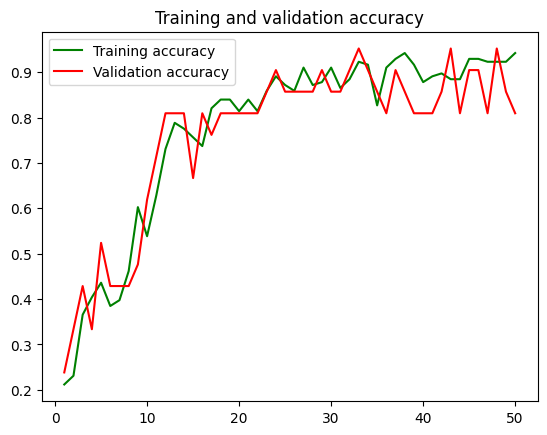

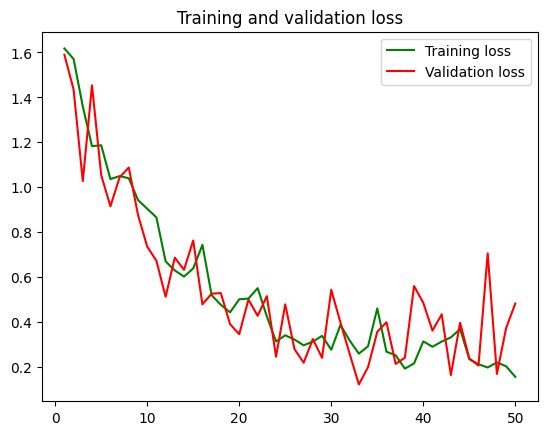

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
model.save(filepath="save_model/")

In [ ]:
from tensorflow.keras.models import load_model
plant = load_model('best_model.hdf5')

In [ ]:
class_names = sorted(os.listdir('Soil types'))
class_names

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure


def eval_model(model):
    class_names = ['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
    val_gen= valid_datagen.flow_from_directory(
                    directory='Soil types/',
                    target_size = (224,224),
                    shuffle = False,
                    classes=class_names , # classes to predict
                    seed=43 ,# to make the result reproducible
                    subset = "validation")

    model_preds = model.predict(val_gen)
    predicted_labels = np.argmax(model_preds, axis=1)
    classes = val_gen.classes



   # list of target class names
    print(classification_report(predicted_labels,classes))


    cm = confusion_matrix(classes, predicted_labels)

    figure(figsize=(20, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    plt.title('Confusion matrix',fontsize=15)
    plt.colorbar()
    plt.xticks(range(5),class_names, fontsize=12,rotation=60)
    plt.yticks(range(5),class_names, fontsize=12,verticalalignment="center")
  # Iteating over cells to write number of prediction for each class
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > np.max(cm)/2. else "black")
    plt.xlabel('Predicted label',fontsize=15)
    plt.ylabel('True label',fontsize=15)

Found 21 images belonging to 5 classes.
1/1 [==============================] - 0s 301ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         4
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         4

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



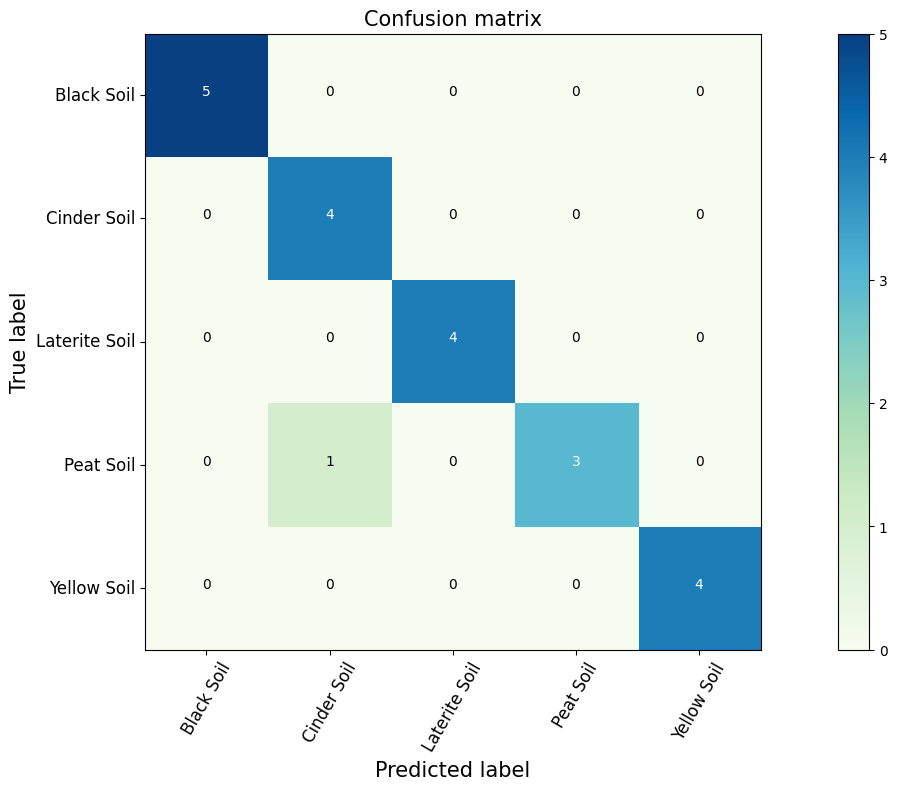

In [ ]:
eval_model(plant)

In [ ]:
preds = sorted(os.listdir('Soil types'))
preds_idx = [0,1,2,3,4]
preds = dict(zip(preds_idx,preds))
preds

{0: 'Black Soil',
 1: 'Cinder Soil',
 2: 'Laterite Soil',
 3: 'Peat Soil',
 4: 'Yellow Soil'}

In [ ]:
from keras.preprocessing import image
img = image.load_img("Black-cotton-soil-Properties-types-formation-and-benefits-f.webp")

1/1 [==============================] - 0s 345ms/step
True Label: Peat Soil
Prediction: [[3.6692533e-01 1.2501791e-01 4.9866187e-05 5.0797176e-01 3.5115776e-05]]


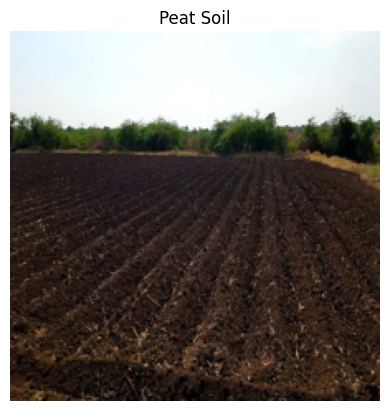

In [ ]:
img = img.resize((224, 224))

# Convert the image to a numpy array and normalize the pixel values
img_array = np.array(img) / 255.0

# Add a batch dimension to the array
img_array = np.expand_dims(img_array, axis=0)

# Make the prediction
pred = model.predict(img_array)

# Get the true label
true_label = np.argmax(pred)

# Print the true label name
print('True Label:', class_names[true_label])

# Show the image and the prediction
plt.axis("off")
plt.imshow(img)
plt.title(class_names[true_label])
print('Prediction:', pred)